In [1]:
pip install scikit-learn

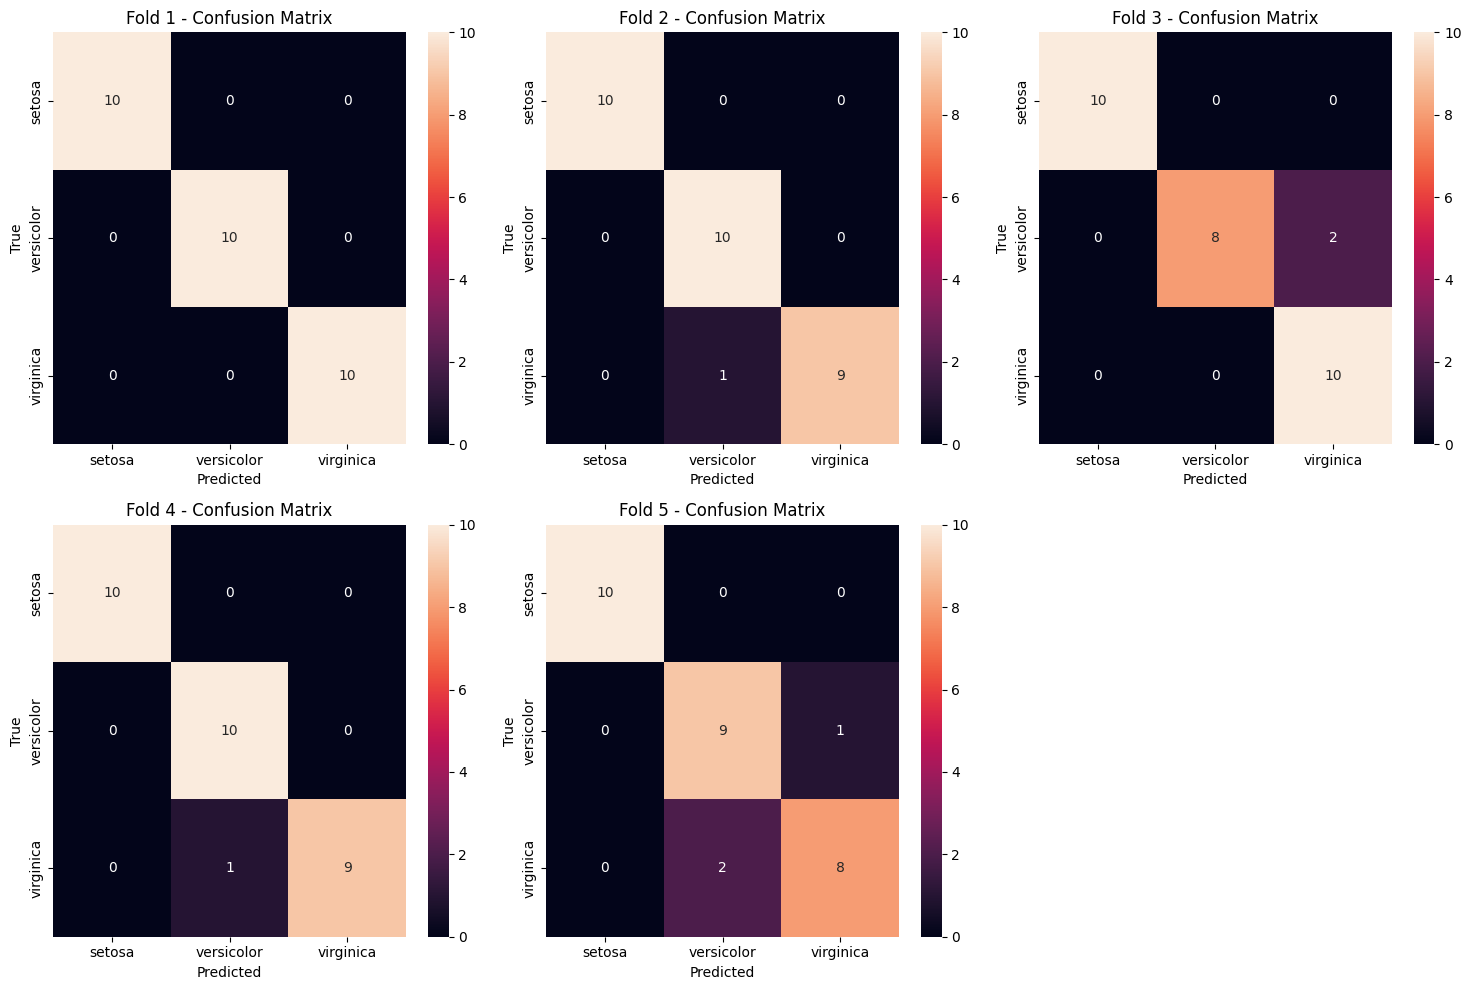

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

# Create a StratifiedKFold object for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store confusion matrices
confusion_matrices = []

# Perform cross-validation and get predicted labels
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Visualize the confusion matrices
plt.figure(figsize=(15, 10))
for i, cm in enumerate(confusion_matrices, 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Fold {i} - Confusion Matrix')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classification Report for Fold 1:
              precision    recall  f1-score   support

      setosa       0.53      1.00      0.69        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.18      0.33      0.23        30
weighted avg       0.18      0.33      0.23        30

Classification Report for Fold 2:
              precision    recall  f1-score   support

      setosa       0.57      1.00      0.72        13
  versicolor       0.00      0.00      0.00        10
   virginica       0.00      0.00      0.00         7

    accuracy                           0.43        30
   macro avg       0.19      0.33      0.24        30
weighted avg       0.24      0.43      0.31        30

Classification Report for Fold 3:
              precision    recall  f1-score   support

      setosa       0.60      1.00      0.75        12
  versicolor       0.20    

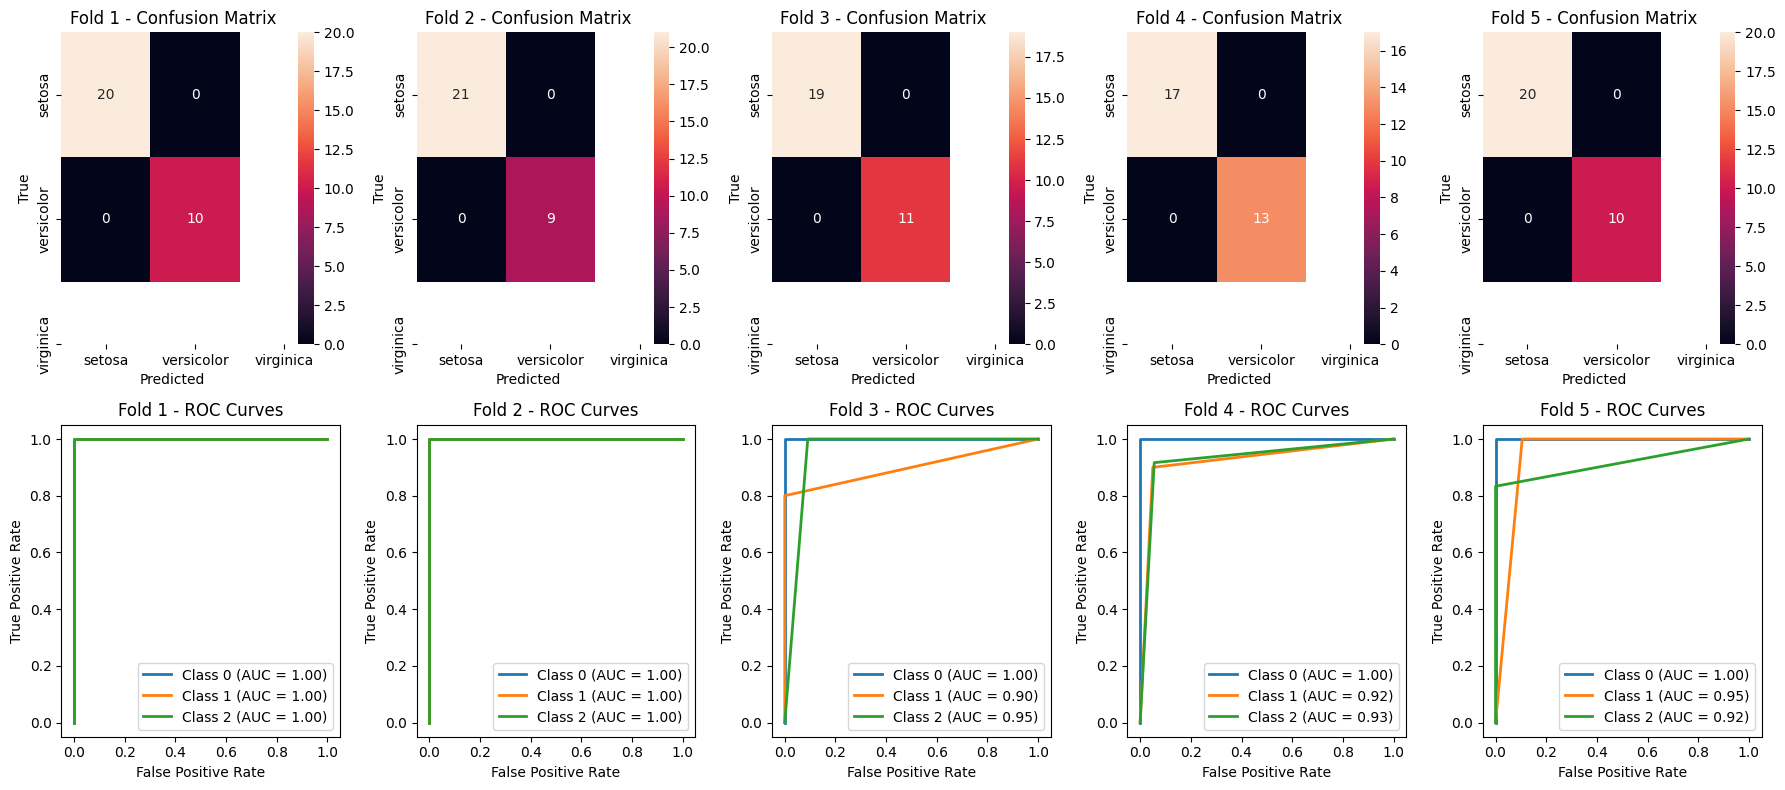

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
from sklearn.preprocessing import label_binarize

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

# Create a KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store various metrics
confusion_matrices = []
roc_curves = []
precision_recall_curves = []
classification_reports = []

# Perform cross-validation and get predicted labels
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create binary classification scenarios for each class
    y_bin = label_binarize(y, classes=np.unique(y))

    roc_curves_fold = []
    precision_recall_curves_fold = []

    for class_idx in range(y_bin.shape[1]):
        dtc.fit(X_train, y_bin[train_index, class_idx])
        y_pred = dtc.predict(X_test)
        cm = confusion_matrix(y_bin[test_index, class_idx], y_pred)
        confusion_matrices.append(cm)

        y_score = dtc.predict_proba(X_test)[:, 1]  # Probability of class 1
        fpr, tpr, _ = roc_curve(y_bin[test_index, class_idx], y_score)
        roc_curves_fold.append((fpr, tpr))

        precision, recall, _ = precision_recall_curve(y_bin[test_index, class_idx], y_score)
        precision_recall_curves_fold.append((precision, recall))

    roc_curves.append(roc_curves_fold)
    precision_recall_curves.append(precision_recall_curves_fold)

    report = classification_report(y_test, y_pred, target_names=data.target_names)
    classification_reports.append(report)

# Visualize the confusion matrices, ROC curves, and precision-recall curves
plt.figure(figsize=(18, 8))
for i, (cm, roc_folds, prc_folds, report) in enumerate(zip(confusion_matrices, roc_curves, precision_recall_curves, classification_reports), 1):
    plt.subplot(2, 5, i)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Fold {i} - Confusion Matrix')

    for class_idx, (roc, prc) in enumerate(zip(roc_folds, prc_folds)):
        plt.subplot(2, 5, i + 5)
        plt.plot(roc[0], roc[1], lw=2, label=f'Class {class_idx} (AUC = {auc(roc[0], roc[1]):.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Fold {i} - ROC Curves')
        plt.legend(loc="lower right")

# Display classification reports
for i, report in enumerate(classification_reports, 1):
    print(f'Classification Report for Fold {i}:')
    print(report)

plt.tight_layout()
plt.show()
